<a href="https://colab.research.google.com/github/prit-tech/Digit-Recognizer/blob/master/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab/Hackathons/Digit Recognizer/')

In [3]:
pwd

'/content/drive/My Drive/Colab/Hackathons/Digit Recognizer'

In [0]:
path = '/content/drive/My Drive/Colab/Hackathons/Digit Recognizer/'

In [5]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train = pd.read_csv(path+'train.csv')
test  = pd.read_csv(path+'test.csv')

In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
x = train.drop(labels=['label'], axis=1)
y = train['label']

In [9]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
x.iloc[3].to_numpy()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 220, 179,   6,   0,   0,   0,   0,   0,   0,   0,
         0,   9,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  28, 247,  17,   0,   0,   0,   

In [0]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='hot')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2)), xy=(y,x), horizontalalignment='center', verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

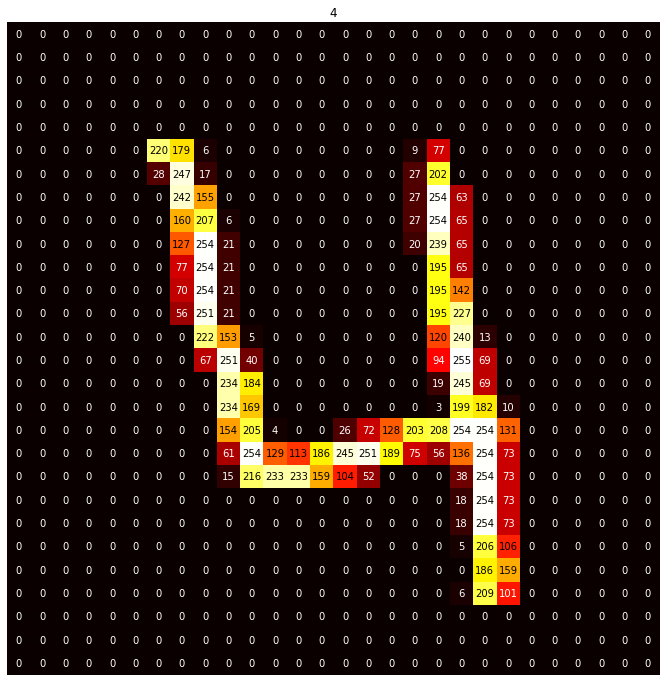

In [12]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
visualize_input(x.iloc[3].to_numpy().reshape(28,28), ax)
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

In [0]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()

x = norm.fit_transform(x)
test = norm.fit_transform(test)

In [14]:
x.shape

(42000, 784)

In [0]:
x = x.reshape(-1, 28, 28, 1)

In [0]:
test = test.reshape(-1, 28, 28, 1)

In [17]:
x.shape

(42000, 28, 28, 1)

In [18]:
test.shape

(28000, 28, 28, 1)

In [19]:
y.shape

(42000,)

In [20]:
from keras.utils.np_utils import to_categorical
y = to_categorical(y, num_classes=10)

Using TensorFlow backend.


In [21]:
y.shape

(42000, 10)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.
# For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, 
# stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2, stratify=y)

In [25]:
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)
print('test: ', test.shape)

x_train:  (29400, 28, 28, 1)
x_test:  (12600, 28, 28, 1)
y_train:  (29400, 10)
y_test:  (12600, 10)
test:  (28000, 28, 28, 1)


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, BatchNormalization, LeakyReLU, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [0]:
model = Sequential()
model.add(Conv2D(filters=256, kernel_size=3, padding='Same', input_shape=(28, 28, 1) ))
model.add(Conv2D(filters=128, kernel_size=3, padding='Same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same'))
model.add(Conv2D(filters=64, kernel_size=3, padding='Same'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation="softmax"))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 256)       2560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       295040    
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        36896     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)       

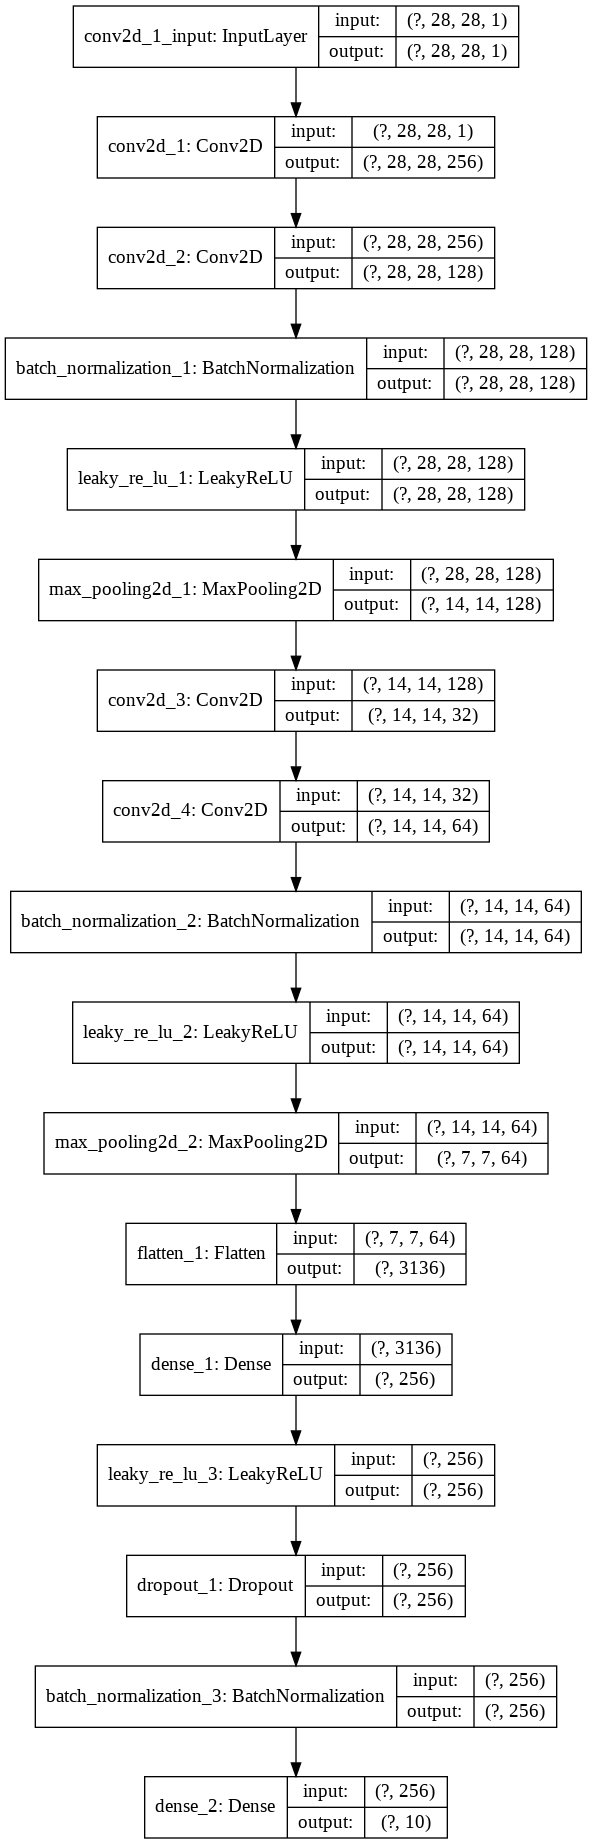

In [29]:
from tensorflow import keras
keras.utils.plot_model(model, 'digit_model.png', show_shapes=True)

In [0]:
from keras.optimizers import RMSprop, Adam, SGD, Adagrad, Adadelta, Adamax, Nadam

In [0]:
#optimizer=Adamax(lr=0.0002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
optimizer=Adamax(lr=0.0002, beta_1=0.9, beta_2=0.999, decay=0.0)

In [0]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [0]:
from keras.callbacks import ReduceLROnPlateau,BaseLogger
lr_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.1, min_lr=0.00001)
b_l=BaseLogger(stateful_metrics=None)

In [0]:
callbacks=[lr_reduction,b_l]
batch_size=65
epochs=10

In [0]:
datagen = ImageDataGenerator()

In [36]:
datagen.get_random_transform(img_shape=(28,28,1),seed=3)

{'brightness': None,
 'channel_shift_intensity': None,
 'flip_horizontal': 0,
 'flip_vertical': 0,
 'shear': 0,
 'theta': 0,
 'tx': 0,
 'ty': 0,
 'zx': 1,
 'zy': 1}

In [37]:
datagen.flow(x=x, y=y, batch_size=32, shuffle=True, sample_weight=None, seed=None, save_to_dir=None, save_prefix='', save_format='png', subset=None)

In [0]:
datagen.fit(x_train)


In [39]:
x_train.shape[0] / batch_size

452.3076923076923

In [40]:
print(datagen.flow(x_train, y_train, batch_size=batch_size))

In [41]:
information = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                                  epochs=epochs,validation_data = (x_test, y_test), steps_per_epoch=x_train.shape[0] // batch_size,callbacks=callbacks) 

Epoch 1/10
452/452 [==============================] - 1054s 2s/step - loss: 0.0383 - accuracy: 0.9873 - val_loss: 0.1296 - val_accuracy: 0.9578
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


452/452 [==============================] - 1056s 2s/step - loss: 0.0152 - accuracy: 0.9954 - val_loss: 0.0167 - val_accuracy: 0.9944
Epoch 3/10
452/452 [==============================] - 1055s 2s/step - loss: 0.0111 - accuracy: 0.9965 - val_loss: 0.0101 - val_accuracy: 0.9969
Epoch 4/10
452/452 [==============================] - 1054s 2s/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.0082 - val_accuracy: 0.9974
Epoch 5/10
452/452 [==============================] - 1055s 2s/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.0085 - val_accuracy: 0.9972
Epoch 6/10
452/452 [==============================] - 1053s 2s/step - loss: 0.0059 - accuracy: 0.9983 - val_loss: 0.0083 - val_accuracy: 0.9973
Epoch 7/10
452/452 [==============================] - 1057s 2s/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0096 - val_accuracy: 0.9969
Epoch 8/10
452/452 [==============================] - 1050s 2s/step - loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.0071 - val_accuracy: 0.9979
Epo

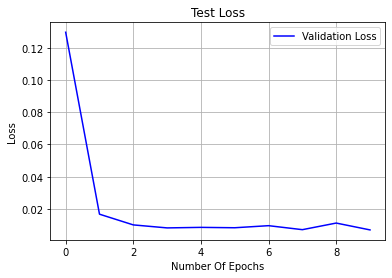

In [42]:
plt.plot(information.history["val_loss"],color="blue",label="Validation Loss")
plt.title("Test Loss")
plt.xlabel("Number Of Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

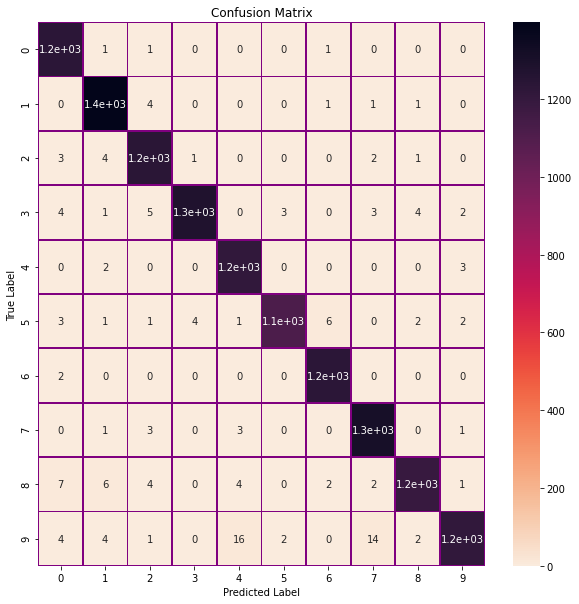

In [43]:
Y_head=model.predict(x_test)
Y_head_class=np.argmax(Y_head,axis=1)
Y_true=np.argmax(y_test,axis=1)
conf_mtrx=confusion_matrix(Y_true,Y_head_class)
plt.subplots(figsize=(10,10))
sb.heatmap(conf_mtrx,annot=True,linewidths=0.8,cmap="rocket_r",linecolor="purple")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [0]:
karsilastirma=pd.DataFrame()
karsilastirma["prediction"]=Y_head_class
karsilastirma["true"]=Y_true

In [45]:
karsilastirma['correct'] = karsilastirma.prediction == karsilastirma.true 
karsilastirma["correct"].value_counts()

True     12453
False      147
Name: correct, dtype: int64

In [46]:
karsilastirma[karsilastirma['correct']==False]

,prediction,true,correct
174,2,1,False
175,6,5,False
216,7,9,False
322,4,9,False
358,4,7,False
...,...,...,...
12259,4,8,False
12260,0,3,False
12443,2,3,False
12459,4,9,False


In [0]:
predicted= model.predict(test)

In [0]:
predicted = np.argmax(predicted,axis = 1)

predicted = pd.Series(predicted,name="Label")

In [0]:
result = pd.concat([pd.Series(range(1,len(test)+1),name = "ImageId"),predicted],axis = 1)

result.to_csv("Digit_Recognizer_predicted.csv",index=False)

In [50]:
result.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [0]:
 # Save model
model.save('MNIST_Recognizer.h5')